In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
from pandas import DataFrame
import csv
import glob
import os
import pandas as pd
from os import walk

In [4]:
folder_name = 'Data/Import 1'
file_type = 'csv'
seperator =','
f = []
for (dirpath, dirnames, filenames) in walk('Data/Import 1'):
    for x in filenames:
        if x.startswith('MSA_M'):
            f.append(x)
          
    import_1_data = pd.DataFrame() # initialize empty df
for filename in f:
        df = pd.read_csv(folder_name+"/"+filename, sep=seperator) # read in each csv to df
        df['YEAR'] = filename # add a column with the filename
        import_1_data = import_1_data.append(df) # add all small df's to big df 

import_1_data['YEAR'] = import_1_data['YEAR'].map(lambda x: x.lstrip('MSA_M').rstrip('_dl.csv')) 
import_1_clean = import_1_data.drop(columns=['GROUP', 'ANNUAL', 'HOURLY'])
imp1 = import_1_clean.loc[(import_1_data['AREA']==16740) | (import_1_data['AREA']==39580),:]
imp1 = imp1[imp1['OCC_TITLE']=="All Occupations"]

In [5]:
folder_name = 'Data/Import 2'
file_type = 'csv'
seperator =','
f = []
for (dirpath, dirnames, filenames) in walk('Data/Import 2'):
    for x in filenames:
        if x.startswith('MSA_M'):
            f.append(x)
          
    import_2_data = pd.DataFrame() # initialize empty df
for filename in f:
        df = pd.read_csv(folder_name+"/"+filename, sep=seperator) # read in each csv to df
        df['YEAR'] = filename # add a column with the filename
        import_2_data = import_2_data.append(df) # add all small df's to big df 

import_2_data['YEAR'] = import_2_data['YEAR'].map(lambda x: x.lstrip('MSA_M').rstrip('_dl.csv')) 
import_2_clean = import_2_data.drop(columns=['GROUP', 'JOBS_1000','ANNUAL', 'HOURLY'])
imp2 = import_2_clean.loc[(import_2_data['AREA']==16740) | (import_2_data['AREA']==39580),:]
imp2 = imp2[imp2['OCC_TITLE']=="All Occupations"]



In [6]:
folder_name = 'Data/Import 3'
file_type = 'csv'
seperator =','
f = []
for (dirpath, dirnames, filenames) in walk('Data/Import 3'):
    for x in filenames:
        if x.startswith('MSA_M'):
            f.append(x)
          
    import_3_data = pd.DataFrame() # initialize empty df
for filename in f:
        df = pd.read_csv(folder_name+"/"+filename, sep=seperator) # read in each csv to df
        df['YEAR'] = filename # add a column with the filename
        import_3_data = import_3_data.append(df) # add all small df's to big df 

import_3_data['YEAR'] = import_3_data['YEAR'].map(lambda x: x.lstrip('MSA_M').rstrip('_dl.csv')) 
import_3_clean = import_3_data.drop(columns=['GROUP', 'JOBS_1000','LOC QUOTIENT','ANNUAL', 'HOURLY'])
imp3 = import_3_clean.loc[(import_3_data['AREA']==16740) | (import_3_data['AREA']==39580),:]
imp3 = imp3[imp3['OCC_TITLE']=="All Occupations"]


In [7]:
folder_name = 'Data/Import 4'
file_type = 'csv'
seperator =','
f = []
for (dirpath, dirnames, filenames) in walk('Data/Import 4'):
    for x in filenames:
        if x.startswith('MSA_M'):
            f.append(x)
          
    import_4_data = pd.DataFrame() # initialize empty df
for filename in f:
        df = pd.read_csv(folder_name+"/"+filename, sep=seperator) # read in each csv to df
        df['YEAR'] = filename # add a column with the filename
        import_4_data = import_4_data.append(df) # add all small df's to big df 

import_4_data['YEAR'] = import_4_data['YEAR'].map(lambda x: x.lstrip('MSA_M').rstrip('_dl.csv')) 
import_4_clean = import_4_data.drop(columns=['OCC_GROUP', 'JOBS_1000','LOC QUOTIENT','ANNUAL', 'HOURLY'])
imp4 = import_4_clean.loc[(import_4_data['AREA']==16740) | (import_4_data['AREA']==39580),:]
imp4 = imp4[imp4['OCC_TITLE']=="All Occupations"]


In [8]:
first_merge = pd.merge(imp1,imp2, how='outer')
second_merge = pd.merge(first_merge, imp3, how = 'outer')
combined_data = pd.merge(second_merge, imp4, how = 'outer')
combined_data.head()


,PRIM_STATE,AREA,AREA_NAME,OCC_CODE,OCC_TITLE,TOT_EMP,EMP_PRSE,H_MEAN,A_MEAN,MEAN_PRSE,...,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,YEAR
0,NC,16740,"Charlotte-Gastonia-Concord, NC-SC",00-0000,All Occupations,859030,0.6,19.81,41200,0.9,...,10.40,15.31,23.48,36.47,16350,21630,31840,48840,75860,2007
1,NC,39580,"Raleigh-Cary, NC",00-0000,All Occupations,505610,0.9,19.64,40840,1.2,...,10.37,15.35,23.76,36.50,16300,21570,31930,49420,75930,2007
2,NC,16740,"Charlotte-Gastonia-Concord, NC-SC",00-0000,All Occupations,878310,0.9,20.43,42490,1.0,...,10.64,15.67,24.30,37.90,16770,22120,32590,50540,78830,2008
3,NC,39580,"Raleigh-Cary, NC",00-0000,All Occupations,515570,0.8,20.27,42170,1.3,...,10.65,15.64,24.53,37.96,16770,22140,32530,51030,78960,2008
4,NC,16740,"Charlotte-Gastonia-Concord, NC-SC",00-0000,All Occupations,837820,0.9,21.10,43890,1.1,...,10.84,16.12,25.05,39.21,17000,22540,33520,52100,81560,2009


In [9]:
folder_name = 'Data/Import 5'
file_type = 'csv'
seperator =','
f = []
for (dirpath, dirnames, filenames) in walk('Data/Import 5'):
    for x in filenames:
        if x.startswith('national_M'):
            f.append(x)
          
    import_5_data = pd.DataFrame() # initialize empty df
for filename in f:
        df = pd.read_csv(folder_name+"/"+filename, sep=seperator) # read in each csv to df
        df['YEAR'] = filename # add a column with the filename
        import_5_data = import_5_data.append(df) # add all small df's to big df 

import_5_data['YEAR'] = import_5_data['YEAR'].map(lambda x: x.lstrip('national_M').rstrip('_dl.csv')) 
imp5 = import_5_data.drop(columns=['occ_code','group', 'annual', 'hourly','tot_emp','emp_prse','h_mean','a_mean', 
                                   'mean_prse','h_pct10', 'h_pct25', 'h_median', 'h_pct75', 'h_pct90', 'a_pct10', 
                                   'a_pct25', 'a_pct75', 'a_pct90'])
imp5 = imp5[imp5['occ_title']=="All Occupations"]
imp5.columns = map(str.upper, imp5.columns)
imp5

,OCC_TITLE,A_MEDIAN,YEAR
0,All Occupations,31410,2007
0,All Occupations,32390,2008
0,All Occupations,33190,2009


In [10]:
folder_name = 'Data/Import 6'
file_type = 'csv'
seperator =','
f = []
for (dirpath, dirnames, filenames) in walk('Data/Import 6'):
    for x in filenames:
        if x.startswith('national_M'):
            f.append(x)
          
    import_6_data = pd.DataFrame() # initialize empty df
for filename in f:
        df = pd.read_csv(folder_name+"/"+filename, sep=seperator) # read in each csv to df
        df['YEAR'] = filename # add a column with the filename
        import_6_data = import_6_data.append(df) # add all small df's to big df 

import_6_data['YEAR'] = import_6_data['YEAR'].map(lambda x: x.lstrip('national_M').rstrip('_dl.csv')) 
imp6 = import_6_data.drop(columns=['OCC_CODE','GROUP', 'ANNUAL', 'HOURLY','TOT_EMP','EMP_PRSE','H_MEAN','A_MEAN', 
                                   'MEAN_PRSE','H_PCT10', 'H_PCT25', 'H_MEDIAN', 'H_PCT75', 'H_PCT90', 'A_PCT10', 
                                   'A_PCT25', 'A_PCT75', 'A_PCT90'])
imp6 = imp6[imp6['OCC_TITLE']=="All Occupations"]
imp6

,OCC_TITLE,A_MEDIAN,YEAR
0,All Occupations,"33,840",2010
0,All Occupations,"34,460",2011


In [11]:
folder_name = 'Data/Import 7'
file_type = 'csv'
seperator =','
f = []
for (dirpath, dirnames, filenames) in walk('Data/Import 7'):
    for x in filenames:
        if x.startswith('national_M'):
            f.append(x)
          
    import_7_data = pd.DataFrame() # initialize empty df
for filename in f:
        df = pd.read_csv(folder_name+"/"+filename, sep=seperator) # read in each csv to df
        df['YEAR'] = filename # add a column with the filename
        import_7_data = import_7_data.append(df) # add all small df's to big df 

import_7_data['YEAR'] = import_7_data['YEAR'].map(lambda x: x.lstrip('national_M').rstrip('_dl.csv')) 
imp7 = import_7_data.drop(columns=['OCC_CODE','OCC_GROUP', 'ANNUAL', 'HOURLY','TOT_EMP','EMP_PRSE','H_MEAN','A_MEAN', 
                                   'MEAN_PRSE','H_PCT10', 'H_PCT25', 'H_MEDIAN', 'H_PCT75', 'H_PCT90', 'A_PCT10', 
                                   'A_PCT25', 'A_PCT75', 'A_PCT90'])
imp7 = imp7[imp7['OCC_TITLE']=="All Occupations"]
imp7

,OCC_TITLE,A_MEDIAN,YEAR
0,All Occupations,"34,750",2012
0,All Occupations,"35,080",2013
0,All Occupations,"35,540",2014
0,All Occupations,"36,200",2015
0,All Occupations,"37,040",2016
0,All Occupations,"37,690",2017


In [12]:
nat_data_merge_1 = pd.merge(imp5,imp6, how='outer')
nat_data_total = pd.merge(nat_data_merge_1,imp7,how='outer')

In [13]:
combined_data.set_index('AREA', inplace=True)
char_data = pd.DataFrame(combined_data.loc[16740])
char_data = np.unique(char_data['A_MEDIAN'])
ral_data = pd.DataFrame(combined_data.loc[39580])
ral_data = np.unique(ral_data['A_MEDIAN'])
nat_data = np.unique(nat_data_total['A_MEDIAN'])

In [14]:
charlotte_median_salary = []
for n in char_data:
    charlotte_median_salary.append(n.replace(',',''))
    
raleigh_median_salary = []
for n in ral_data:
    raleigh_median_salary.append(n.replace(',',''))
    
national_median_salary =[]    
for n in nat_data:
    national_median_salary.append(n.replace(',',''))

In [15]:
charlotte_median_salary = [ int(x) for x in charlotte_median_salary ]
raleigh_median_salary = [int(x) for x in raleigh_median_salary]
national_median_salary = [int(x) for x in national_median_salary]

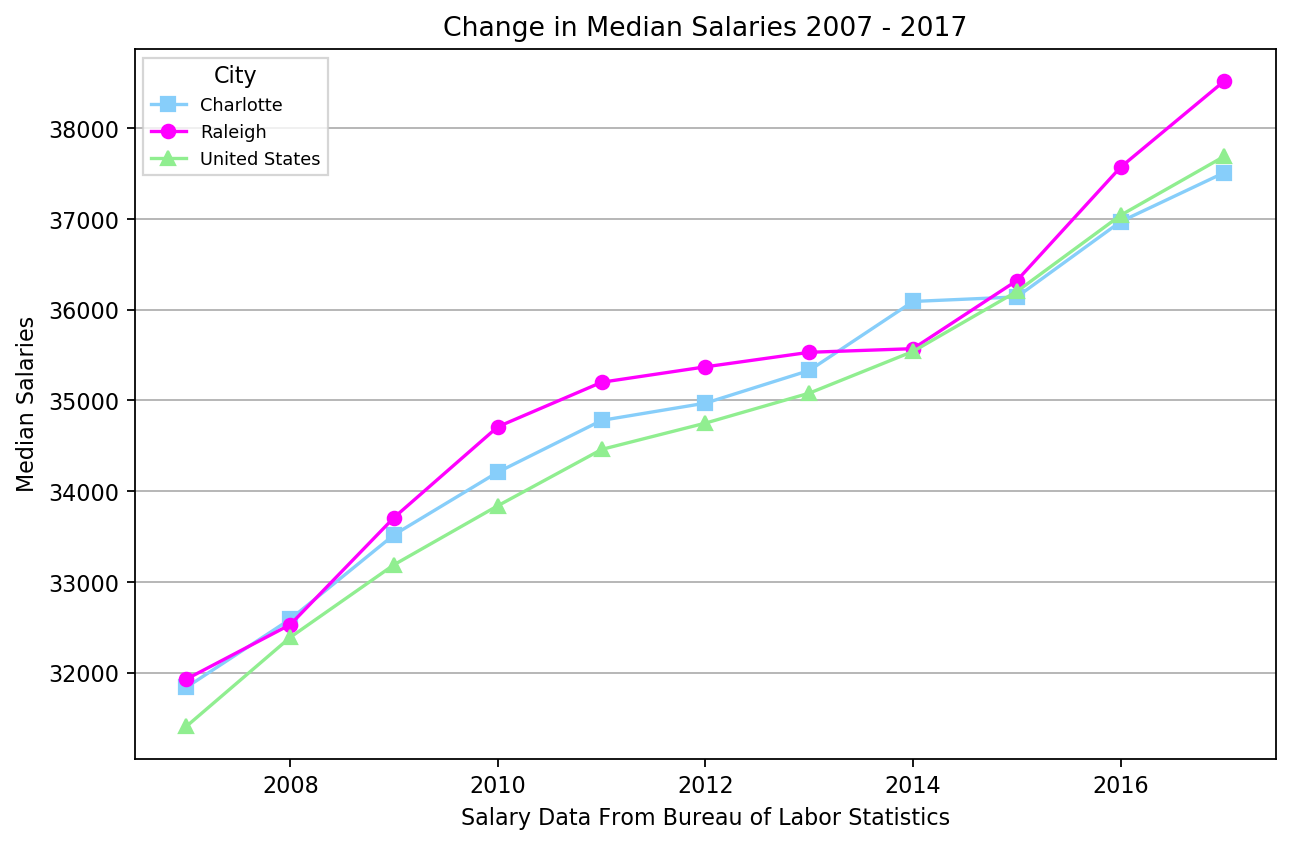

In [16]:
# median_price = data['Median Price']
years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]

from matplotlib.pyplot import figure
figure(num=1, figsize=(8, 5), dpi=160, facecolor='w', edgecolor='k')

# # plotting data

plt.plot(years,charlotte_median_salary, color='lightskyblue',marker = 's', label = "Charlotte")
plt.plot(years,raleigh_median_salary, color='magenta', marker ='o', label = "Raleigh")
plt.plot(years,national_median_salary,color = 'lightgreen', marker ='^', label = "United States")

legend = plt.legend(loc="upper left",ncol=1, shadow=False, title="City", fancybox=False, fontsize=8)

plt.gca().yaxis.grid(True)

plt.tight_layout()
plt.ylabel("Median Salaries")
plt.xlabel("Salary Data From Bureau of Labor Statistics")
plt.title("Change in Median Salaries 2007 - 2017")



plt.savefig("Output/Median_Salary_Graph", bbox_inches = 'tight')
plt.show()